

# Project: Investigating a Dataset of No-show appointments in Brazil.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#Functions">Functions</a> </li>  
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction



# Asking Questions

### Which age group shows for appointments the most? 
### Does long term dieseases have an affect on the appointment attendace ? 
### Check the ratio of attending patients in the top 5 biggest neighbourhoods 
### Is having a scholarship in brasil famillia affect the attending ratio
### Does SMS messages influence attendance ?
### Does male and female ratio attendance differ ?


In [237]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('project2.csv') #loading csv to a dataframe
plt.style.use("ggplot") # this is a style of plotting which makes plots look a bit better.



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [238]:
# Load your data and print out a few lines. Perform operations to inspect data
df.head()





,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [239]:
#   types and look for instances of missing or possibly errant data.
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [240]:
df.info() #checking if any column has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Changing Date columns Data type from object to Datetime

In [241]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['Hypertension']=df['Hipertension'] # here I copied the hipertension column to a column called hypertension
df.drop("Hipertension",axis=1,inplace=True) # then I dropped the Hipertension column from the dataset because its spelled out wrong.


### This shows that the dataset didnt have any NA values or duplicated rows.

In [242]:
df.isna().sum() # checks for null values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
Hypertension      0
dtype: int64

In [243]:
df.duplicated().sum() #checks for duplicated rows and sums them


0

### Checking for duplicated patient IDs

In [244]:
df['PatientId'].duplicated().sum() # here I check the duplicated patient IDs

48228

##### There are a lot of duplicated IDs. Lets check if their attendance is recurring

In [245]:
df.duplicated(['PatientId','No-show']).sum() #here i check the duplicated patient IDs and recurring attendance all together

38710

#### Lets drop these as they are ruining our data.

In [246]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,Hypertension
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.071865,0.030400,0.022248,0.321026,0.197246
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.258265,0.171686,0.161543,0.466873,0.397921
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### As you have noticed there is a row with age -1 which is insensible data. And so I am going to drop that row while cleaning.

In [247]:
df.groupby(['Age']).count() # checking if there is a wrong typed ages

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Hypertension
Age,,,,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539
1,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
2,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
3,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,6,6,6,6,6,6,6,6,6,6,6,6,6
99,1,1,1,1,1,1,1,1,1,1,1,1,1
100,4,4,4,4,4,4,4,4,4,4,4,4,4


<a id='Functions'></a>
# Making some useful functions to avoid repeating code.

In [248]:
def plot_bar_of(labels,x,xlabel,ylabel,title,color,alpha,label):
    """
    Loads a bar chart with a lots of features like colors and transparency
    
    
     labels: this is usually an array and it contains the sequence of the names of the bars in the chart
     
     x: x is the numerical data of that will be assigned for each bar and it is in the form of array and has numbers in it
     
     (str)xlabel: is the label of x axis
     
     
     (str)ylabel: is the label of y axis

     (str)title : is the title of the whole chart
     
     (str)color: the color of the bar chart
     (float/number) alpha: its from 0 to 1 and it contains the transparency of the chart. 1 is not transparent while
     0 is fully transparent
     
     (str)label: is the label of the chart it can be used when comparing two bar charts in one figure and using legend
     the label will let the legend label the chat with the color and its name to identify the meaning of the colors.
    
    
    
    
    """
    plt.bar(labels,x,color=color,alpha=alpha,label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [249]:
def query_dataset(dataframe,column,expression):
    """
    args:
    dataframe is the dataframe that the column will be extracted from to do the boolean expression 
    (string)column : is the column name of the dataset
    expression: is the boolean expression 
    
    return:
       a dataframe/dataset that satisfies the boolean expression
    
    """
    dataset=dataframe[dataframe[column] ==expression]
    return dataset



### Data Trimming and fixing

### This basically makes show column easier to unerstand with YES=1 NO=0 this will help in counting and sum of people that showed for the appointment hence better in visualizing as well.

In [250]:
df=df.drop_duplicates(['PatientId','No-show']) # dropping duplicated values found in patiendID and recurring attendance
df.shape

(71817, 14)

In [251]:

df['show']=df['No-show'].replace({'No': 1, 'Yes': 0}) 
"""

making a new column called "show". it replaces the data in No-show column from No to 1 and Yes to 0
 so that it can be used to sum people who showed up.
 
Note: No in the no show column means the person showed up so thats why I replaced no with 1 and yes with 0


"""


'\n\nmaking a new column called "show". it replaces the data in No-show column from No to 1 and Yes to 0\n so that it can be used to sum people who showed up.\n \nNote: No in the no show column means the person showed up so thats why I replaced no with 1 and yes with 0\n\n\n'

### Here I basically make a small query to get rows with the Age = -1 to drop this row.

In [252]:
bad_Age=query_dataset(df,"Age",-1) # used the function to get the rows with age -1 
bad_Age


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Hypertension,show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,No,0,1


In [253]:
df.index[df['Age'] == -1].tolist() # findint the index of rows with age =  -1

[99832]

In [254]:
df.drop([99832], inplace=True) # dropping that row


### making sure the row is gone. Its gone!

In [255]:
df.Age.value_counts()

0      2401
1      1614
2      1189
3      1067
5      1050
       ... 
98        5
115       3
100       3
102       2
99        1
Name: Age, Length: 103, dtype: int64

## I have noticed that there are some columns that might not be of use in my data analysis process so I will go ahead and drop them.

In [256]:
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],axis=1,inplace=True)
# dropping columns that are not very useful in my data analysis

In [257]:
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Hypertension,show
0,F,62,JARDIM DA PENHA,0,0,0,0,0,No,1,1


In [258]:
df.rename(columns={'No-show':'No_show'},inplace=True)# renaming No-show to No_show column

In [259]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Hypertension,show
0,F,62,JARDIM DA PENHA,0,0,0,0,0,No,1,1
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,0,1
2,F,62,MATA DA PRAIA,0,0,0,0,0,No,0,1
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,1
4,F,56,JARDIM DA PENHA,0,1,0,0,0,No,1,1


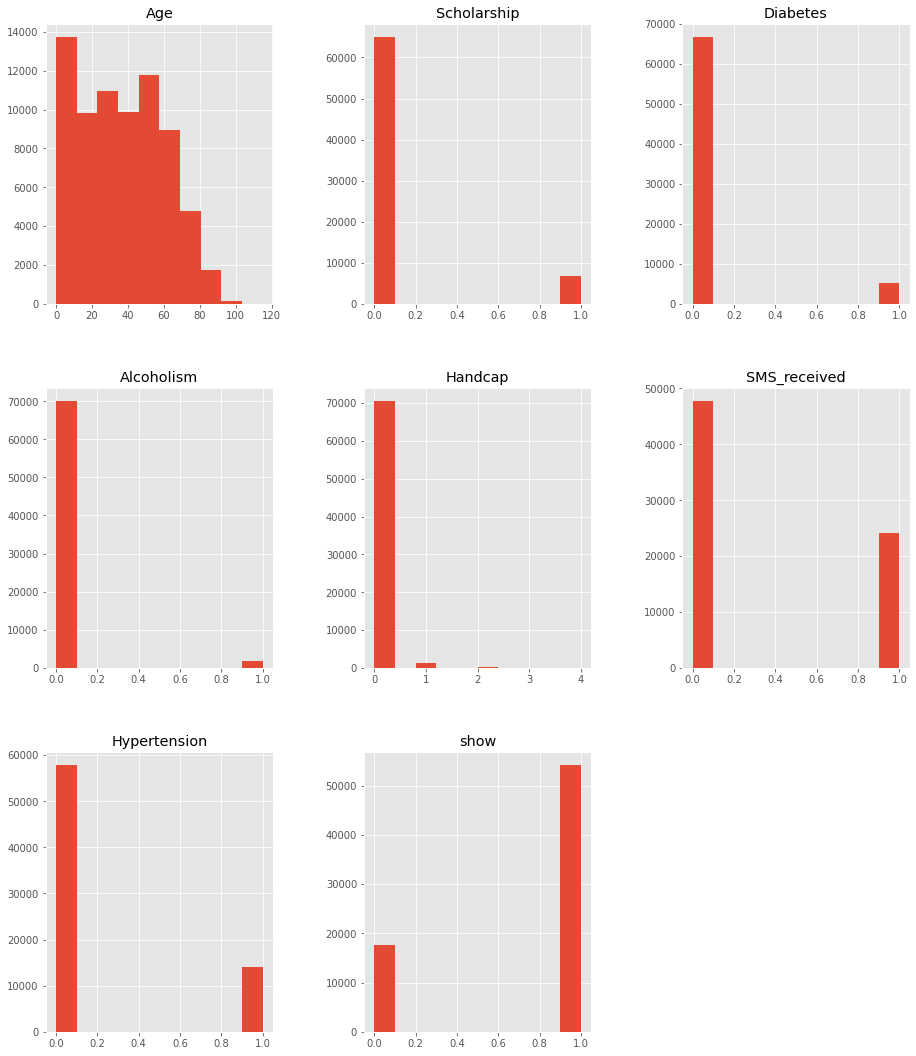

In [260]:
df.hist(figsize=(15,10)) # this is just a general histograms for the dataset to have an idea of the numerical data in the dataset
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.3))


In [261]:
df.describe()

,Age,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,Hypertension,show
count,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,36.527501,0.095536,0.070959,0.025036,0.020135,0.335566,0.195068,0.754052
std,23.378262,0.293956,0.256758,0.156236,0.155338,0.472191,0.396256,0.430651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [262]:
# Here I made two variables that can be used as a boolean expression to check if a person showed up or not
show=df.No_show=='No'  
noshow=df.No_show=='Yes'


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: Which age group shows for appointments the most?

Text(0.5, 0, 'Age')

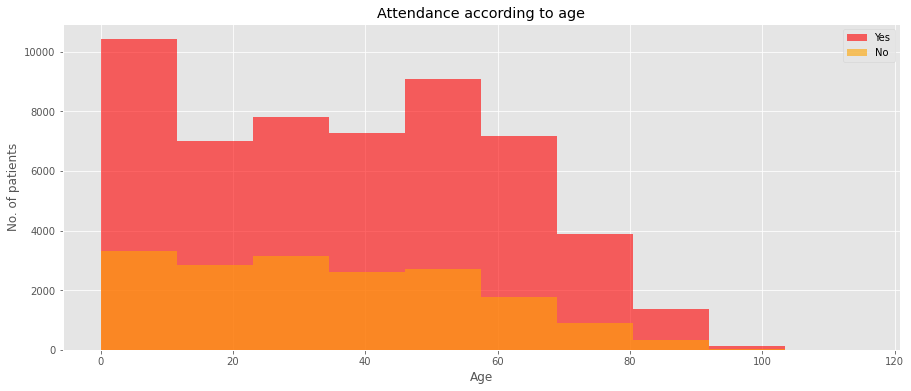

In [263]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# here I am checking ages that showed and that didnt show then plotted them as a histogram on top of each other

plt.figure(figsize=[15,6])
df['Age'][show].hist(color="red",alpha=0.6,label="Yes")
df['Age'][noshow].hist(color="orange",alpha=0.6,label="No")
plt.legend()
plt.title("Attendance according to age")
plt.ylabel("No. of patients")
plt.xlabel("Age")
          




#### At age 0-10 are the most attending age group though there are a lot of difference between other ages.

### This is made to simplify all these ages to groups of ages to simplify the data

In [264]:
#bins is basically the range of each age group e.g.(from 0 to 3 is a toddler and from 3 to 12 is a kid)
bins=[0,3,12,19,30,50,120]
index_age_grp=['toddler','kid','teen','young','adult','old']
df['age_group']=pd.cut(df["Age"],bins,labels=index_age_grp) 
"""
 this function categorises data and cuts it in chunks according to the bins array
 so that the ages can be categorized into groups and ranges can be named according to the index age grp array 
 now lets try group by again
"""

'\n this function categorises data and cuts it in chunks according to the bins array\n so that the ages can be categorized into groups and ranges can be named according to the index age grp array \n now lets try group by again\n'

In [265]:
age_show =df.groupby(['age_group'])['show'].sum() #this shows the function worked great and shows the attendance of age groups!
age_show

age_group
toddler     3050
kid         6079
teen        4462
young       7024
adult      13662
old        18048
Name: show, dtype: int64

### Great! Now I can visualize the following in a bar chart!
### Conclusion: Apparently its most likely an old or adult person would show up for an appointment than any other age group!
#### Note: This is contradicting the histogram above, This is because "Old" age group is a wide range of ages from 50 to 120 meanwhile toddlers and kids are very short ranges. this show that the majority of attendance is from old and adult people but a specific age that attends the most is 0~10 years old

Text(0.5, 1.0, 'Attendance according to age groups')

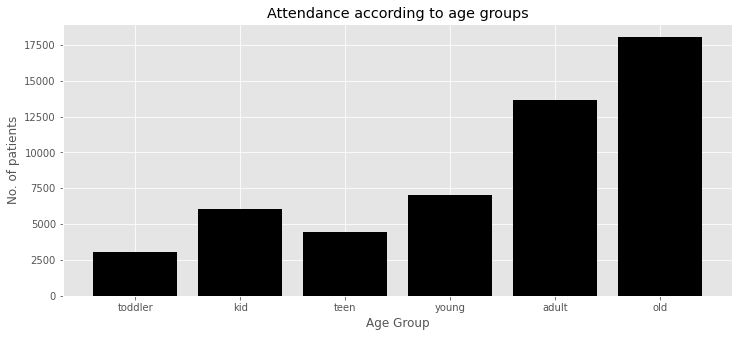

In [266]:
plt.figure(figsize=[12,5])#plotting attendance of age groups using plot function made before.
plot_bar_of(index_age_grp,age_show,"Age Group","No. of patients",None,"Black",None,None)
plt.title("Attendance according to age groups")

### Question 2: Does long term dieseases have an affect on the appointment attendace ?

### Here I am extracting different dataframes that has people with different diseases/handicaps.

In [267]:
# These variables are made from the function made before which returns a dataset that satisfies the boolean expression
# note: scroll up to see the function's docstring
Hypertension_df=query_dataset(df,"Hypertension",1)
Diabetes_df=query_dataset(df,"Diabetes",1)
Alcoholism_df=query_dataset(df,"Alcoholism",1)
Handcap_df=query_dataset(df,"Handcap",1)
no_Hypertension_df=query_dataset(df,"Hypertension",0)
no_Diabetes_df=query_dataset(df,"Diabetes",0)
no_Alcoholism_df=query_dataset(df,"Alcoholism",0)
no_Handcap_df=query_dataset(df,"Handcap",0)

## Still confused from the function and can not find it? no worries!
<h2><a href="#Functions">CLICK HERE!</a></h2>


In [268]:
Hypertension_df

,Gender,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Hypertension,show,age_group
0,F,62,JARDIM DA PENHA,0,0,0,0,0,No,1,1,old
4,F,56,JARDIM DA PENHA,0,1,0,0,0,No,1,1,old
5,F,76,REPÚBLICA,0,0,0,0,0,No,1,1,old
25,M,46,CONQUISTA,0,0,0,0,1,No,1,1,adult
26,F,45,BENTO FERREIRA,0,0,0,0,0,No,1,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...
110383,F,48,RESISTÊNCIA,0,0,0,0,0,Yes,1,0,adult
110456,F,79,RESISTÊNCIA,0,1,0,0,0,No,1,1,old
110468,F,76,RESISTÊNCIA,0,1,0,0,1,No,1,1,old
110476,F,80,RESISTÊNCIA,0,0,0,0,1,No,1,1,old


In [269]:
# This groups by the different diseases and uses the show column to sum the patients that arrived
Diabetes_show=df.groupby(['Diabetes'])["show"].sum()[1]
Alcoholism_show=df.groupby(['Alcoholism'])["show"].sum()[1]
Hypertension_show=df.groupby(['Hypertension'])["show"].sum()[1]
Handcap_show=df.groupby(['Handcap'])["show"].sum()[1]
index_D_show=['Diabetes','Alcoholism','Hypertension','Handcap']


Diabetes_show

3946

### This is is a plot of a bar chart that shows its most likely a person with Hypertension would show up for their appointment.

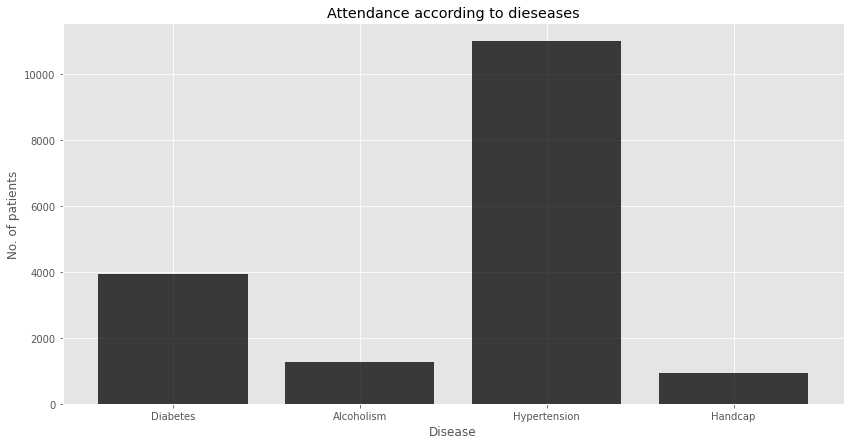

In [270]:
plt.figure(figsize=[14,7])
# Plots a bar with the attendance accordint to diseases
plot_bar_of(index_D_show,[Diabetes_show,Alcoholism_show,Hypertension_show,Handcap_show],"Disease","No. of patients","Attendance according to dieseases","Black",0.75,None)

In [271]:
"""
# Here I made variables that finds the percentage of attendance of each dataset 
# and then I made array data1 with the percentages of attendance of people who have diseases
# while data2 array has the percentages of attendance of people without the disease
# value counts returns the count of '1'which is who attended and count of '0' by typing [1] this extracts only the
# attending patients
"""
HP=Hypertension_df.show.value_counts(1)[1]*100
DP=Diabetes_df.show.value_counts(1)[1]*100
AP=Alcoholism_df.show.value_counts(1)[1]*100
HPP=Handcap_df.show.value_counts(1)[1]*100
NHP=no_Hypertension_df.show.value_counts(1)[1]*100
NDP=no_Diabetes_df.show.value_counts(1)[1]*100
NAP=no_Alcoholism_df.show.value_counts(1)[1]*100
NHPP=no_Handcap_df.show.value_counts(1)[1]*100
data1=[DP,AP,HP,HPP]
data2=[NDP,NAP,NHP,NHPP]

### This plot shows that there is very little to no correlation between attendance and diseases as percentages are quite close to each other with people who attened and who didn't

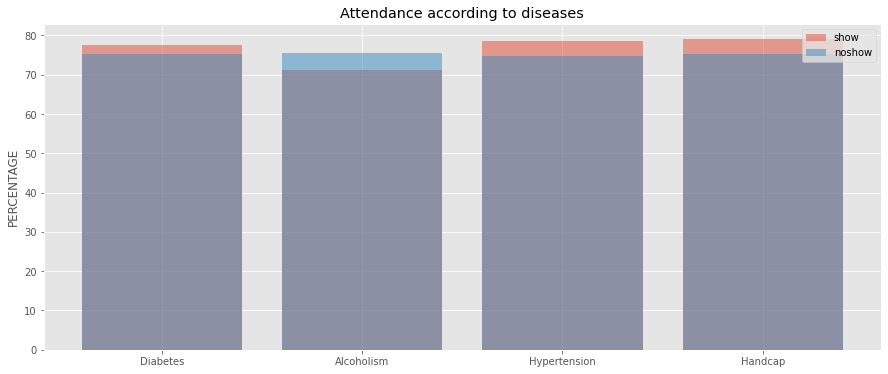

In [272]:
plt.figure(figsize=[15,6])
plot_bar_of(index_D_show,data1,None,"PERCENTAGE","Attendance according to diseases",None,0.5,"show")

plot_bar_of(index_D_show,data2,None,"PERCENTAGE","Attendance according to diseases",None,0.5,"noshow")
plt.legend()


## Question 3 : How scholarships and SMS messages influence the attendance

In [273]:
#Using the query dataset function again to extract specific datasets to be used for visualizations
scholar_Q=query_dataset(df,"Scholarship",1)
sms_Q=query_dataset(df,"SMS_received",1)
no_scholar_Q=query_dataset(df,"Scholarship",0)
no_sms_Q=query_dataset(df,"SMS_received",0)

Text(0.5, 1.0, 'Attendance according to scholarships and SMS campaigns')

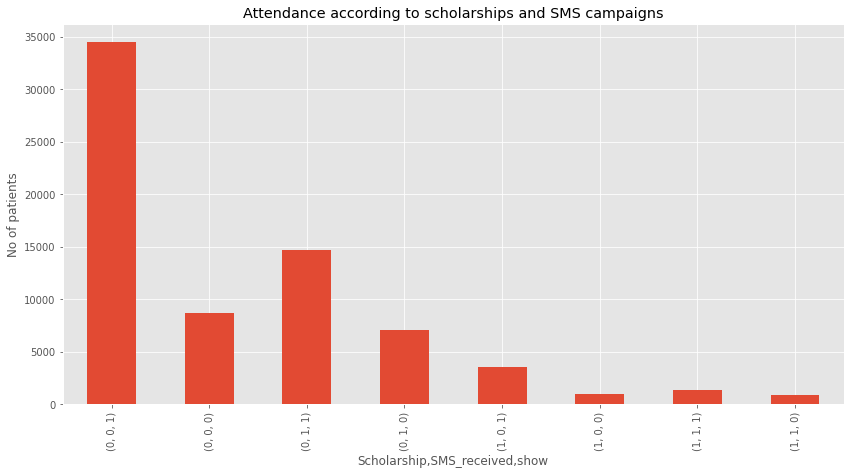

In [274]:
plt.figure(figsize=[14,7])
df.groupby(['Scholarship','SMS_received'])["show"].value_counts().plot(kind='bar')
plt.ylabel("No of patients")
plt.title("Attendance according to scholarships and SMS campaigns")

#### this plot shows that no relation between people attending or not but there is a huge issue where people who attended without SMS messages showed up more than people who attended with recieving them. This means the SMS messages system that is used is ineffective and is not pumping messages to patients as supposed to be.

In [275]:
#Finding the percentage of people who attended with scholarships and recieved SMS and vice versa

SQ=scholar_Q.show.value_counts(1)[1]*100
SMSQ=sms_Q.show.value_counts(1)[1]*100
NSQ=no_scholar_Q.show.value_counts(1)[1]*100
NSMSQ=no_sms_Q.show.value_counts(1)[1]*100

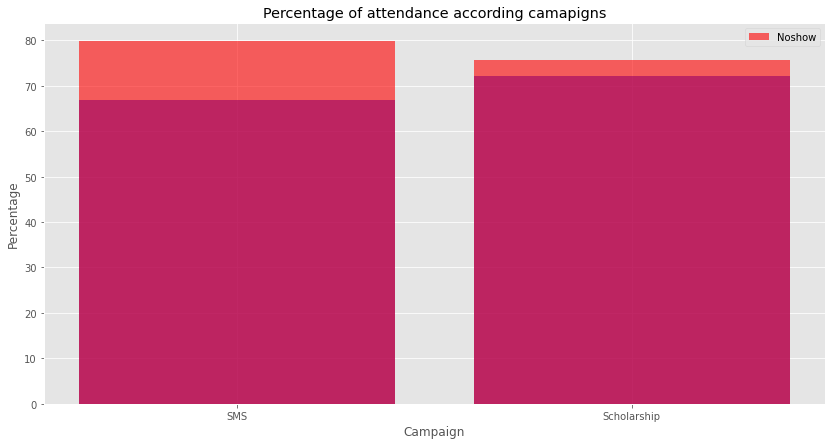

In [276]:
plt.figure(figsize=[14,7]) #Plotting graphs using a fucntion defined above: 
plot_bar_of(['SMS','Scholarship'],[SMSQ,SQ],"Campaign","Percentage","Percentage of attendance according camapigns","Blue",0.6,None)
plot_bar_of(['SMS','Scholarship'],[NSMSQ,NSQ],"Campaign","Percentage","Percentage of attendance according camapigns","Red",0.6,"Noshow")
plt.legend()

### Here SMS has lower attendance than without SMS messages sent meanwhile Scholarship has little effect 

### Question 4 : Does Gender ratio attendance differ ?

Text(0, 0.5, 'No. of patients')

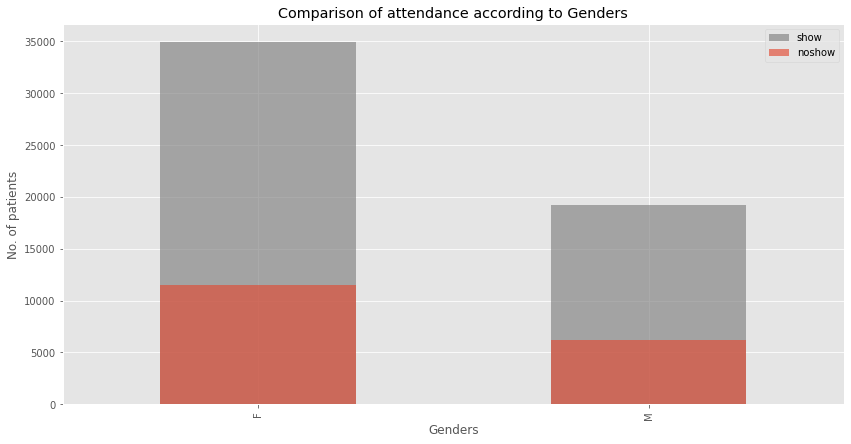

In [277]:
#Plots two bar charts on top of each other which shows the comparison of attendance according to Genders

plt.figure(figsize=[14,7])
df.Gender[show].value_counts().plot(kind="bar", alpha=0.65,label="show", color="Grey")
df.Gender[noshow].value_counts().plot(kind="bar", alpha=0.65,label="noshow")
plt.legend()
plt.title("Comparison of attendance according to Genders")
plt.xlabel("Genders")
plt.ylabel("No. of patients")

In [278]:
#variables made to contain the value counts of the Gender whether Genders showed up
Gender_show=df.Gender[show].value_counts()
Gender_noshow=df.Gender[noshow].value_counts()

In [279]:
#Gender show counts
attending_females=df.Gender[show].value_counts()[0]
attending_males=df.Gender[show].value_counts()[1]



In [280]:
#Gender noshow counts
N_attending_females=df.Gender[noshow].value_counts()[0]
N_attending_males=df.Gender[noshow].value_counts()[1]


In [281]:
# making array with female show and noshow percentage
# making array with male show and no show percentage
fem_percent=[attending_females,N_attending_females]
male_percent=[attending_males,N_attending_males]


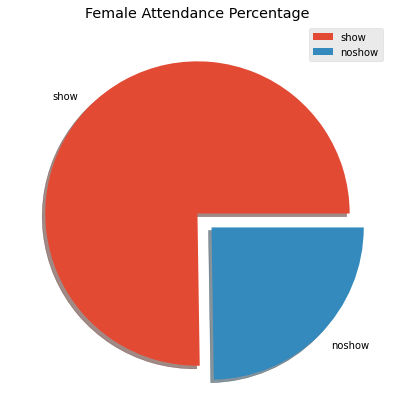

In [282]:
plt.figure(figsize=[14,7])
#Visualizing data with made arrays. explode means popping out the no show part according the its given list
plt.pie(fem_percent,labels=["show","noshow"],explode=[0,0.13],shadow=True)
plt.title("Female Attendance Percentage")
plt.legend()


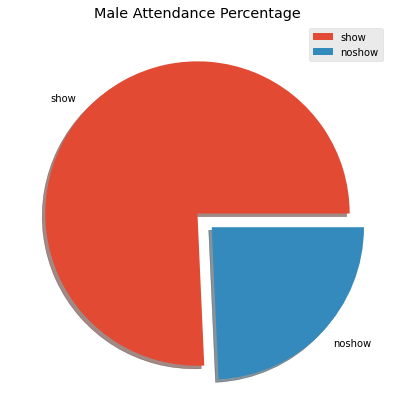

In [283]:
plt.figure(figsize=[14,7])
plt.pie(male_percent,labels=["show","noshow"],explode=[0,0.13],shadow=True)
plt.title("Male Attendance Percentage")
plt.legend()


### sidaisdjas

In [284]:
print(Gender_show)
print(Gender_noshow)


F    34960
M    19193
Name: Gender, dtype: int64
F    11506
M     6157
Name: Gender, dtype: int64


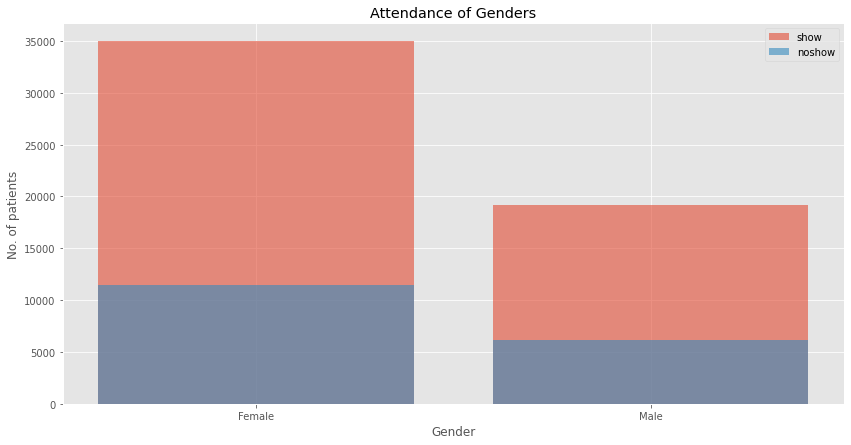

In [285]:
plt.figure(figsize=[14,7])
#Plotting bar chart with attendance of both Genders using the PLOT BAR FUNCTION
plot_bar_of(["Female","Male"],Gender_show,"Gender","No. of patients","Attendance of Genders",None,0.6,"show")
plot_bar_of(["Female","Male"],Gender_noshow,"Gender","No. of patients","Attendance of Genders",None,0.6,"noshow")
plt.legend()

#### This shows that there is no correlation at all between Gender and attendance as the percentages of Genders showing and not showing are almost the same.

### Neighbourhood relations:

In [286]:
#Checking for the neighbourhood with most shows
#checking the indexmax that ouputs the Neighbourhood name right away

df.groupby(['Neighbourhood'])["show"].sum().max()
df.groupby(['Neighbourhood'])["show"].sum().idxmax()


'JARDIM CAMBURI'

Text(0, 0.5, 'No. of patients')

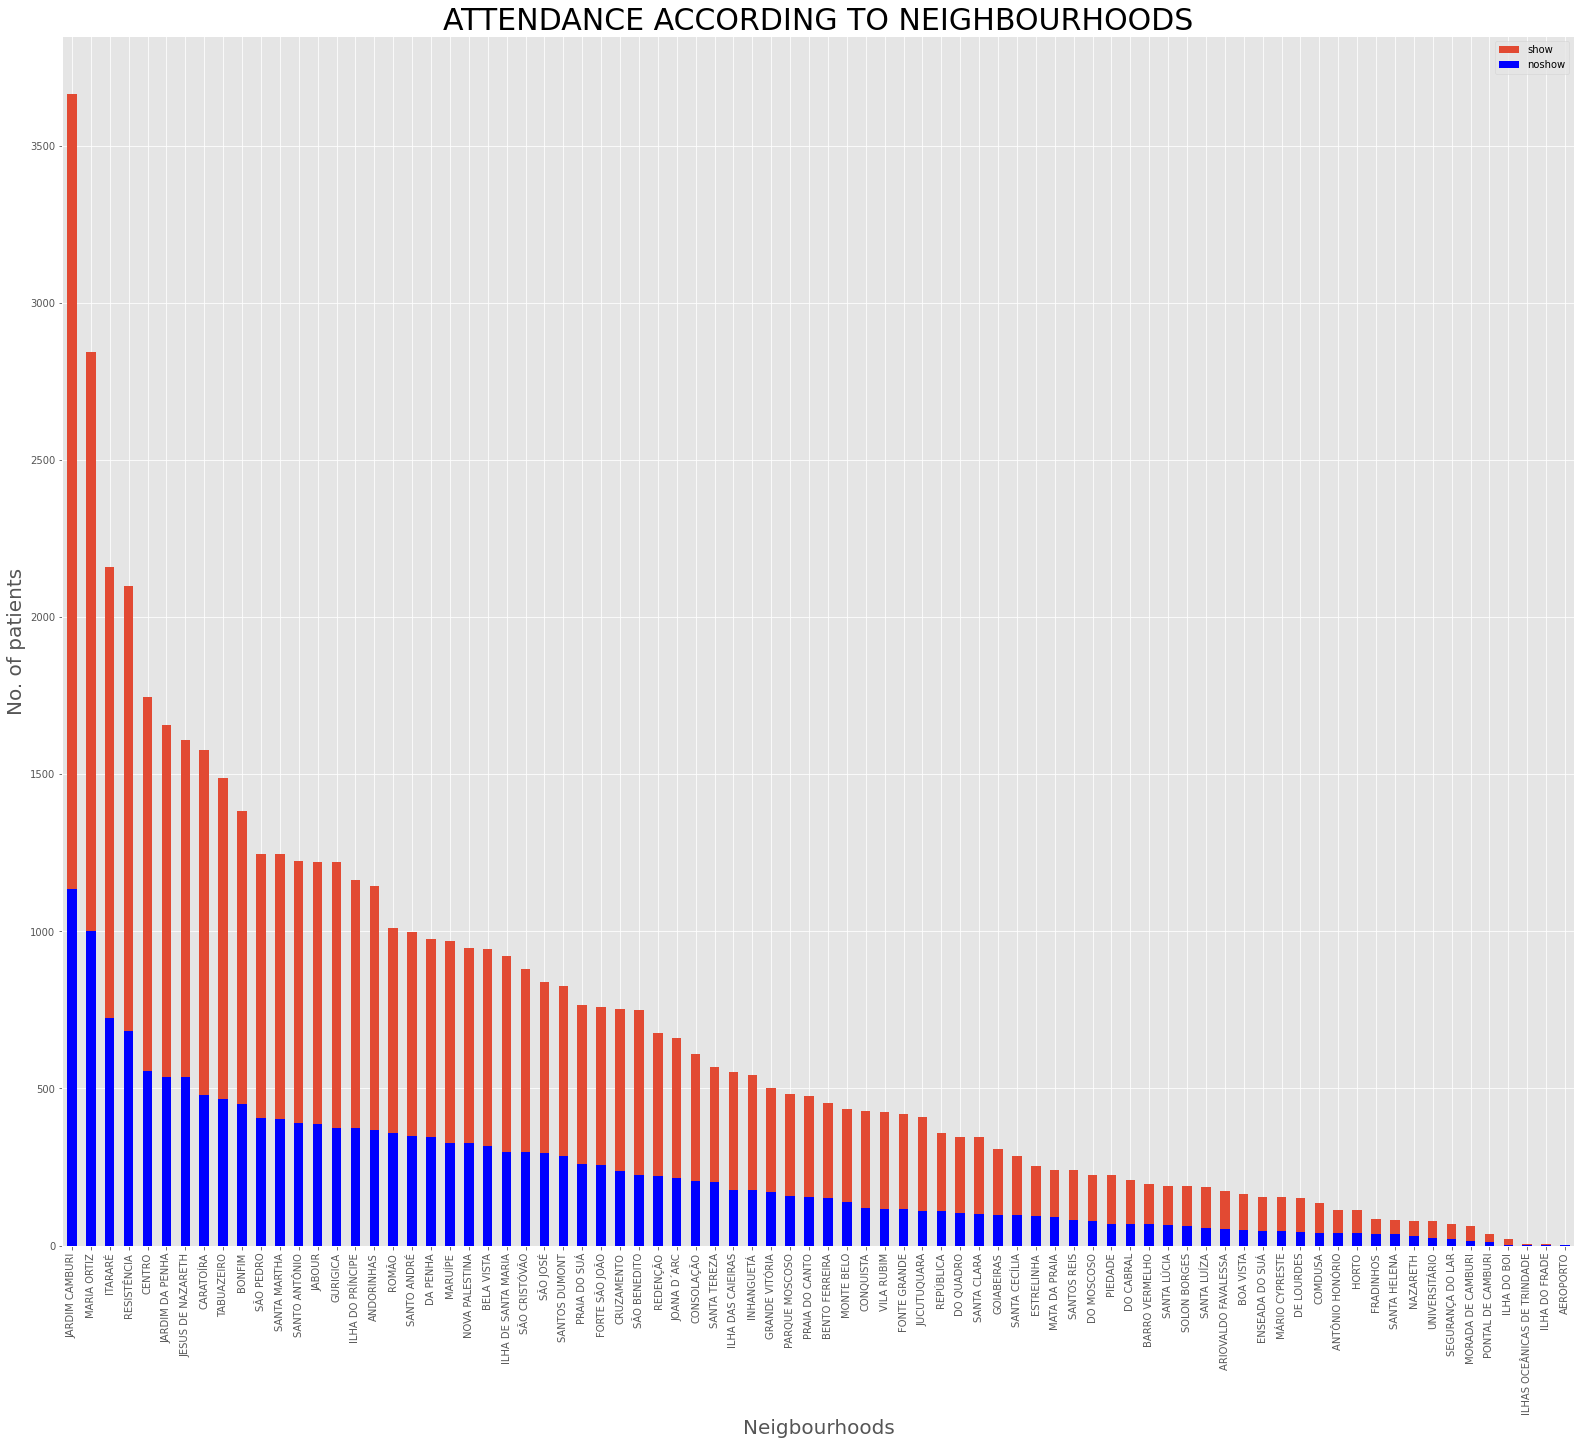

In [287]:
# Plotting the Attendance according to neighbours. some dimensions are given to make data readable as data is huge
plt.figure(figsize=[20,10])
df['Neighbourhood'][show].value_counts().plot(kind="bar",figsize=(15,12),label="show")
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5))
df['Neighbourhood'][noshow].value_counts().plot(kind="bar",figsize=(15,12),color="blue",label="noshow")
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5))
plt.legend()
plt.title("ATTENDANCE ACCORDING TO NEIGHBOURHOODS",fontsize=30)
plt.xlabel("Neigbourhoods",fontsize=20)
plt.ylabel("No. of patients",fontsize=20)

### As shown Neighbourhood has a huge affect on patients' attendance.
### Let's dive deeper!

In [288]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Hypertension,show,age_group
0,F,62,JARDIM DA PENHA,0,0,0,0,0,No,1,1,old
1,M,56,JARDIM DA PENHA,0,0,0,0,0,No,0,1,old
2,F,62,MATA DA PRAIA,0,0,0,0,0,No,0,1,old
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,1,kid
4,F,56,JARDIM DA PENHA,0,1,0,0,0,No,1,1,old


In [289]:
old_df=df[df.Age >30] # finds the dataset with people with age 30 and older.

Text(0, 0.5, 'No. of patients')

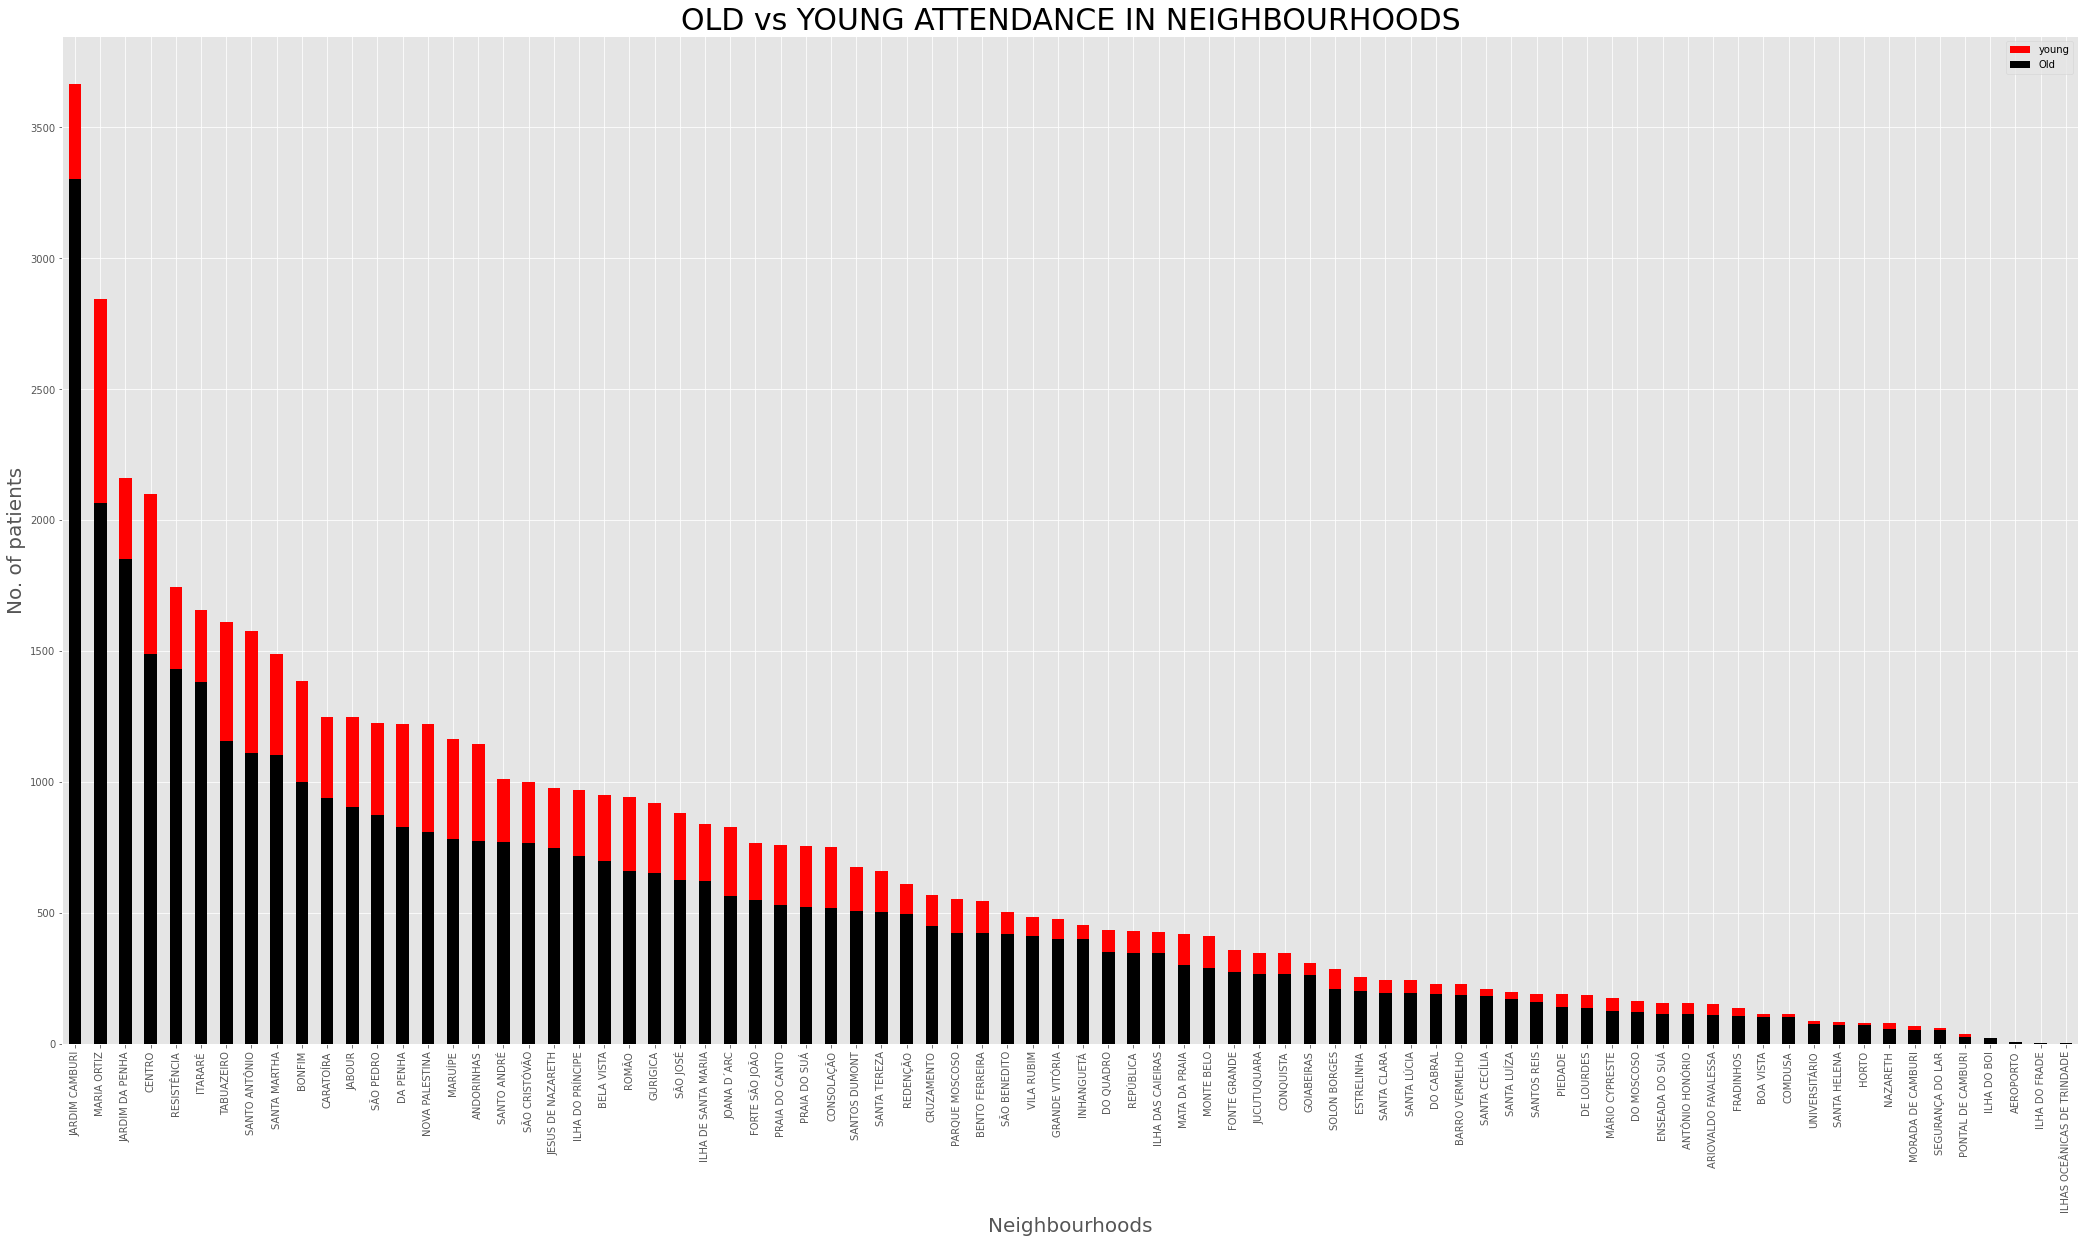

In [290]:
#Comparing the attendance of neighbourhoods from the original dataset with all ages and the Old_df dataset
# Here I put the Old_df plot the second so that it prints on the first bar chart as it has less attendance than all ages
# that way its more visible
df['Neighbourhood'][show].value_counts().plot(kind="bar",figsize=(15,12),color="Red",label="young")
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5))
old_df.Neighbourhood.value_counts().plot(kind='bar',figsize=(20,10),color="Black",label="Old")
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5))
plt.legend()
plt.title("OLD vs YOUNG ATTENDANCE IN NEIGHBOURHOODS",fontsize=30)
plt.xlabel("Neighbourhoods",fontsize=20)
plt.ylabel("No. of patients",fontsize=20)


### The black portion is the percentage of adult and old people in the Neighbourhood. This shows that some neighbourhoods has more old people than others and old people greatly affect the attendance in Neighbourhoods

In [291]:
#uses the old sms_Q variable to further investigate and extract a two datasets that finds people who got sms and showed up and who never showed up 
show_sms=query_dataset(sms_Q,"show",1)
no_show_sms=query_dataset(sms_Q,"show",0)

/var/folders/pr/vr6p73y55vg7k7hwvlp86v_h0000gn/T/ipykernel_15686/1701978314.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_show_sms[noshow].groupby(["Neighbourhood"])["show"].count().plot(kind="bar",figsize=(15,12),color="Black",label="show")


Text(0, 0.5, 'No. of patients')

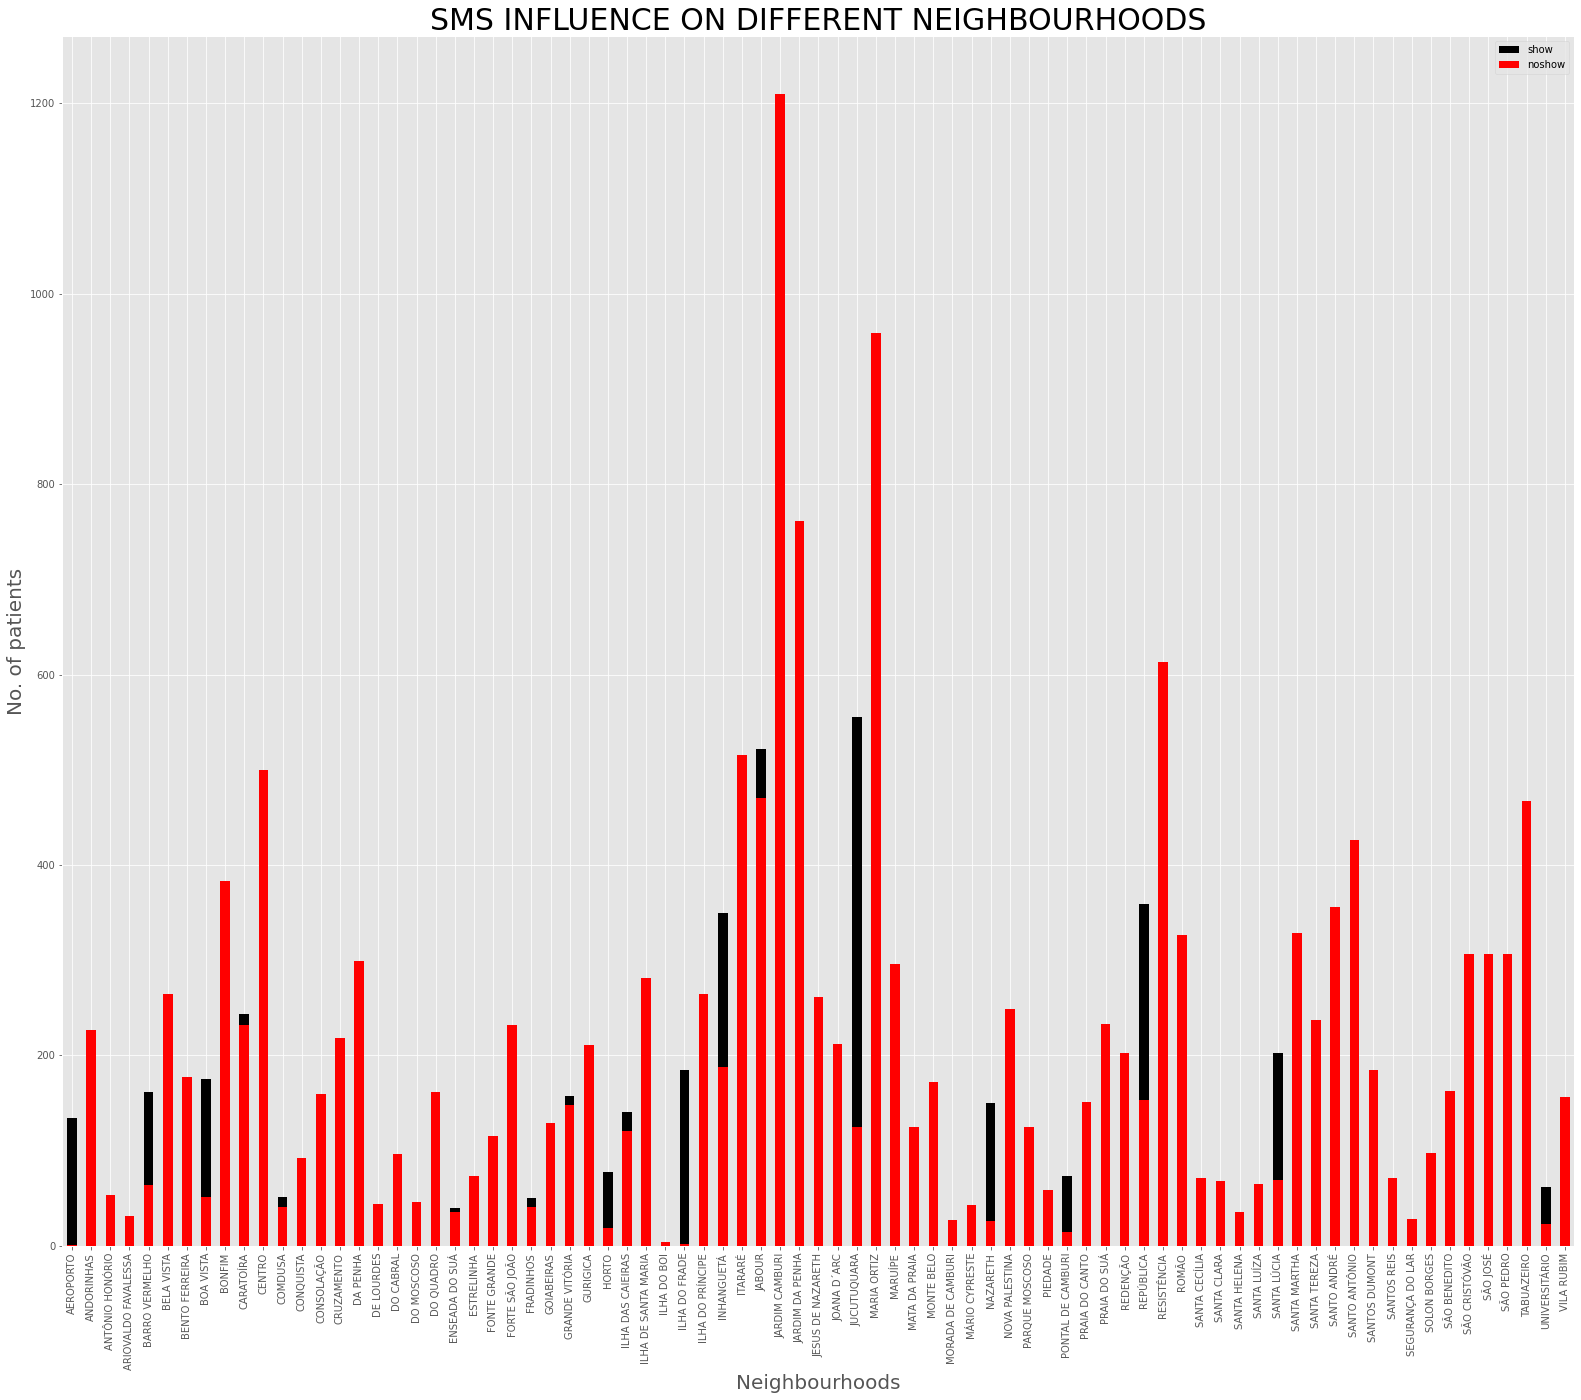

In [292]:
# groups by the noshow sms variable with neighbourhoods and finds the number of patients that didnt show and patients who did
# and then plotting them on the same bar chart to make some statistical conclusions
no_show_sms[noshow].groupby(["Neighbourhood"])["show"].count().plot(kind="bar",figsize=(15,12),color="Black",label="show")
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5))
show_sms.groupby(["Neighbourhood"])["show"].sum().plot(kind="bar",figsize=(15,12),color="Red",label="noshow")
plt.subplots_adjust(plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5))

plt.legend()
plt.title("SMS INFLUENCE ON DIFFERENT NEIGHBOURHOODS",fontsize=30)
plt.xlabel("Neighbourhoods",fontsize=20)
plt.ylabel("No. of patients",fontsize=20)



### The neighbourhoods with black tipped bars are neighbourhood where the SMS campaign worked well. The plot shows that at most times the SMS did not help increase attendance but there are a few neighbourhoods where the SMS campaign worked perfectly.


## Conclusions



#### The most showing age is from 0~10 years old however most patients are older than 30 years old. hence, adults and old patients are most likely to show up for a medical appointment
#### patients who got SMS messages were less likely to show up for the appointment more than patients who did not which is very bad.
#### SMS campaigns launched are very ineffective and they only show good results in a very few neighbourhoods
#### Neighbourhoods has a huge effect on the attendance. JARDIM CAMBURI is a neighbour hood with the greatest patients number This is probably due to many factors such as medical awareness etc. 
#### The dataset showed that neighbourhoods with a spectrum of older ages have greater attendance than others.
#### Diseases and alcholism and handicap issues have been proven to have no affect on the attendance of the patients.
#### Gender has no correlation with attendance at all.
#### scholarship to brasil familia has little to no effect on the attendance percentage


## Limitations:
#### There was no apparent  correlation between Gender, long term diseases, or scholarship enrollment which could have helped bringing better derived conclusions.
#### Dataset could have been better if it included the nearest distance to a medical center which could've made patients to not show up for appointments if it was too far.